# Report

In [5]:
from IPython.display import display, Markdown
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def get_data(s: str):
    res = int(s.split()[1].rstrip('ms'))
    return res

data = []
with open('log.txt', 'r') as file:
    while line := file.readline():
        n, blocks = map(int, line.split())
        linear = [get_data(file.readline()) for _ in range(3)]
        for _ in range(blocks):
            block_size = int(file.readline())
            bl = [get_data(file.readline()) for _ in range(3)]
            data.append([n, block_size, *linear, *bl])
        
cols = ['n', 'block_size', 'seq', 'seq_p1', 'seq_p2', 'bl', 'bl_p1', 'bl_p2']
data_pd = pd.DataFrame(data, columns=cols)
data_pd

,n,block_size,seq,seq_p1,seq_p2,bl,bl_p1,bl_p2
0,500,1,393,86,102,431,134,180
1,500,5,393,86,102,353,75,84
2,500,10,393,86,102,362,82,92
3,500,16,393,86,102,369,82,76
4,500,20,393,86,102,364,97,143
5,500,25,393,86,102,358,95,92
6,500,50,393,86,102,367,67,69
7,500,100,393,86,102,297,89,122
8,500,150,393,86,102,358,127,203
9,1500,1,14240,2801,4553,17193,3643,5677


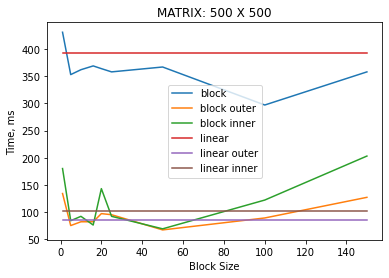

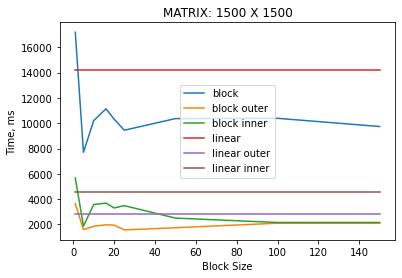

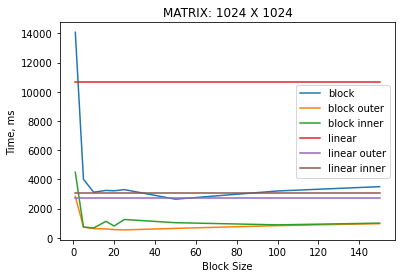

In [6]:
for n in data_pd.n.unique():
    bl = data_pd[data_pd.n == n]
    plt.title(f'MATRIX: {n} X {n}')
    
    plt.plot(bl['block_size'], bl['bl'], label='block')
    plt.plot(bl['block_size'], bl['bl_p1'], label='block outer')
    plt.plot(bl['block_size'], bl['bl_p2'], label='block inner')
    
    plt.plot(bl['block_size'], bl['seq'], label='linear')
    plt.plot(bl['block_size'], bl['seq_p1'], label='linear outer')
    plt.plot(bl['block_size'], bl['seq_p2'], label='linear inner')
    
    plt.xlabel('Block Size')
    plt.ylabel('Time, ms')
    plt.legend()
    plt.show()